# Clustering data with k-means

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as sk_data
import sklearn.metrics as metrics

#import matplotlib as mpl
import seaborn as sns
%matplotlib inline

Today we'll do an extended example showing k-means clustering in practice and in the context of the python libraries
__scikit-learn.__

## Synthetic data

Generally, when learning about or developing a new unsupervised method, it's a good idea to try it out on a dataset in which you already know the "right" answer.

One way to do that is to generate synthetic data that has some known properties.

__scikit-learn__ is the main python library for machine learning functions.  It is extensive.  You will use it a lot :).  It is here: http://scikit-learn.org/stable/documentation.html.

Among other things, it contains tools for generating synthetic data for testing.

In [3]:
X, y = sk_data.make_blobs(n_samples=100, centers=3, n_features=30,
                          center_box=(-10.0, 10.0),random_state=0)

To get a sense of the raw data we can visualize it.

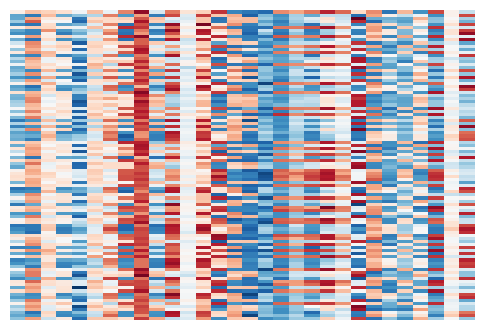

In [4]:
_ = sns.heatmap(X, xticklabels=False, yticklabels=False, linewidths=0,cbar=False)

Now let's compute the pairwise distances for visualization purposes.


We can compute pairwise distances using the **sklearn.metrics** functions summarized here:
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [5]:
euclidean_dists = metrics.euclidean_distances(X)
# euclidean_dists

That plot shows all the data.   These data live in 30 dimensions, so we cannot directly visualize them.   

However, there is a method that can turn a set of pairwise distances into an approximate 2-D representation __in some cases.__

### Visualizing with MultiDimensional Scaling

The idea behind Multidimensional Scaling (MDS) is: given a dissimilarity or distance matrix, find a set of coordinates for the points that approximates those distances as well as possible.

This is done by a gradient descent algorithm that starts with random positions and moves points in a way that reduces the disparity between true distance and euclidean distance.

Note that there are many ways that this can fail!  

* Perhaps the dissimilarities are not well modeled as euclidean distances
* It may be necessary to use more than 2 dimensions to capture any clustering via euclidean distances

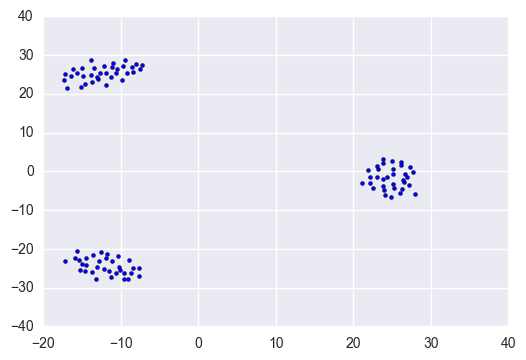

In [6]:
import sklearn.manifold
mds = sklearn.manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=0,
                   dissimilarity="precomputed", n_jobs=1)
fit = mds.fit(euclidean_dists)
pos = fit.embedding_
_ = plt.scatter(pos[:, 0], pos[:, 1], s=8)

We can also visualize the data using the heatmap of pairwise distances.

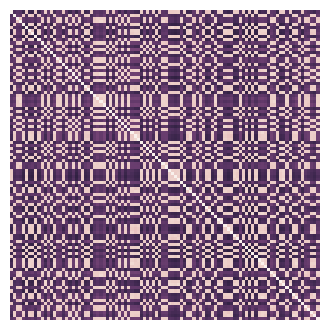

In [7]:
_ = sns.heatmap(euclidean_dists, xticklabels=False, yticklabels=False, linewidths=0, 
            square=True,cbar=False)

## Applying  k-means 

__scikit-learn__ has a huge set of tools for unsupervised learning generally, and clustering specifically.  

These are in sklearn.cluster.  http://scikit-learn.org/stable/modules/clustering.html

There are 3 functions in all the clustering classes, 

* __`fit()`__, 
* __`predict()`__, and 
* __`fit_predict()`__. 

__`fit()`__ builds the model from the training data (e.g. for kmeans, it finds the
            centroids), 
            
__`predict()`__ assigns labels to the data after building
            the model, and
            
__`fit_predict()`__ does both at the same data (e.g in
            kmeans, it finds the centroids and assigns the labels to the dataset).

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=100)
kmeans.fit_predict(X)

array([1, 2, 0, 0, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 2, 0,
       1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 0, 1, 0,
       1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 0, 1, 1,
       2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2,
       2, 0, 1, 0, 0, 2, 2, 0], dtype=int32)

All the tools in `scikit-learn` are implemented as python objects.

Thus, the general sequence for using a tool from `scikit-learn` is:

* Create the object, probably with some parameter settings or intialization,
* Run the method, generally by using the `fit()` function, and
* Examine the results, which are generally instance variables of the object.

In [9]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_

In [10]:
print("The total error of the clustering is: {}.".format(error))
print('\nCluster labels:')
print(labels)
print('\nCluster centroids:')
print(centroids)

The total error of the clustering is: 2733.8430818977895.

Cluster labels:
[1 2 0 0 2 1 2 2 1 2 0 1 0 1 2 0 0 1 0 2 0 2 0 1 2 2 1 0 0 0 0 1 0 1 0 2 0
 2 0 2 2 2 1 0 1 0 1 2 1 0 0 1 1 1 1 0 1 2 2 0 1 0 2 1 1 2 0 1 1 2 2 2 1 1
 0 1 2 1 2 1 2 2 2 1 0 0 2 1 1 0 1 2 2 0 1 0 0 2 2 0]

Cluster centroids:
[[-4.7833887   5.32946939 -0.87141823  1.38900567 -9.59956915  2.35207348
   2.22988468  2.03394692  8.9797878   3.67857655 -2.67618716 -1.17595897
   3.76433199 -8.46317271  3.28114395  3.73803392 -5.73436869 -7.0844462
  -3.75643598 -3.07904369  1.36974653 -0.95918462  9.91135428 -8.17722281
  -5.8656831  -6.76869078  3.12196673 -4.85745245 -0.70449349 -4.94582258]
 [ 0.88697885  4.29142902  1.93200132  1.10877989 -1.55994342  2.80616392
  -1.11495818  7.74595341  8.92512875 -2.29656298  6.09588722  0.47062896
   1.36408008  8.63168509 -8.54512921 -8.59161818 -9.64308952  6.92270491
   5.65321496  7.29061444  9.58822315  5.79602014 -0.84970449  5.46127493
  -7.77730238  2.75092191 -7.170266

### Visualizing the results of clustering

Let's visualize the results.  We'll do that by reording the data items according to their cluster.

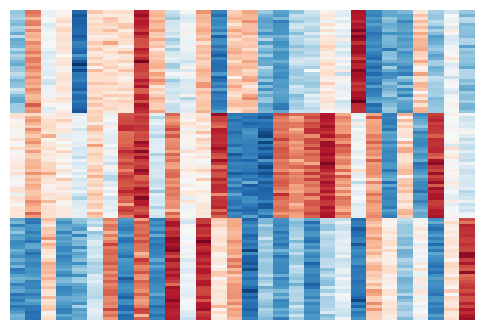

In [11]:
idx = np.argsort(labels)
rX = X[idx,:]
_ = sns.heatmap( rX,xticklabels=False, yticklabels=False, linewidths=0,cbar=False)

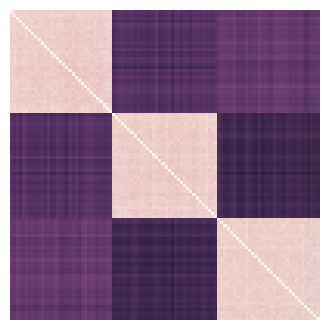

In [12]:
rearranged_dists = euclidean_dists[idx,:][:,idx]
sns.heatmap(rearranged_dists, xticklabels=False, yticklabels=False, linewidths=0, square=True,cbar=False)

## Deciding on the number of clusters

### Using the error function

In [13]:
error = np.zeros(11)
for k in range(1,11):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(X)
    error[k] = kmeans.inertia_

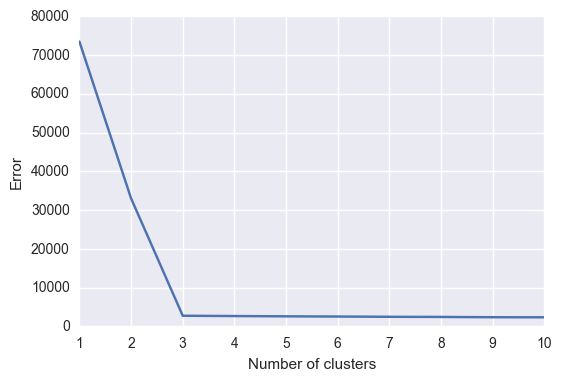

In [14]:
plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
dummy = plt.ylabel('Error')

Let's create a function for later use.

In [15]:
def evaluate_clusters(X,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')

### Adjusted Rand Index

The Rand Index is a simple similarity measure for clusterings.   We can use it to compare two clusterings for similarity.

Or, if we are testing an algorithm on data for which we know ground truth, we can use it to assess the algorithm's accuracy.

If $T$ is a ground truth label assignment and $C$ the clustering. 

Let $a$ be: the number of pairs of elements that have the same label in $T$ and the same label in $C$. 

Also let $b$ be: the number of pairs of elements that have different labels in $T$ and different labels in $C$. 

Then the Rand Index is: 
$$ \mbox{RI}(T,C) = \frac{a+b}{{n \choose 2}} $$


However the RI score does not guarantee that random label assignments will get a value close to zero 

(especially if the number of clusters is in the same order of magnitude as the number of samples). 

To counter this effect we can use the expected RI $E[\text{RI}]$ of random labelings to define the adjusted Rand index as follows:

\begin{equation}
\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}
\end{equation}

The computation of the expected RI is simple combinatorics (and left as an exercise for you :).

In [16]:
ri = metrics.adjusted_rand_score(labels,y)
print(ri)

1.0


Again, we'll create a function to evaluate clusterings.

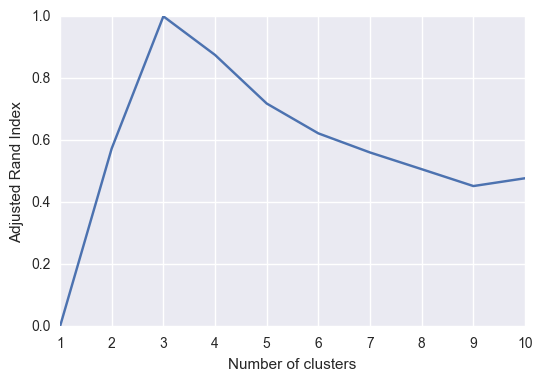

In [17]:
def ri_evaluate_clusters(X,max_clusters,ground_truth):
    ri = np.zeros(max_clusters+1)
    ri[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        ri[k] = metrics.adjusted_rand_score(kmeans.labels_,ground_truth)
    plt.plot(range(1,len(ri)),ri[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Adjusted Rand Index')
    
ri_evaluate_clusters(X,10,y)

### Silhouette Coefficient

If the ground truth labels are not known, evaluation must be performed using the model itself. 

The Silhouette Coefficient (**sklearn.metrics.silhouette_score**) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with "better defined" clusters. 

Let $a$ be the mean distance between a data point and all other points in the same cluster.

Let $b$ be the mean distance between a data point and all other points in the next nearest cluster. 

Then the 
**Silhouette Coefficient** for a clustering is:
$$s = \frac{b - a}{\max(a, b)}$$

In [18]:
sc = metrics.silhouette_score(X, labels, metric='euclidean')
print(sc)

0.83193488414


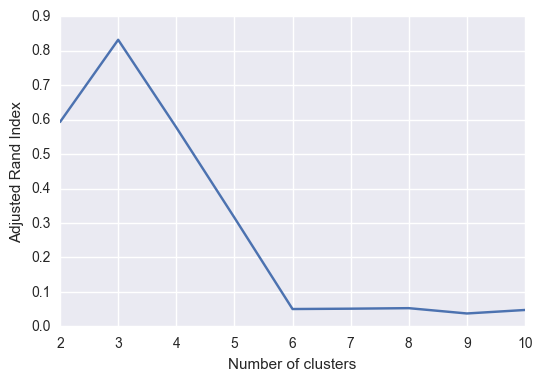

In [19]:
def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Adjusted Rand Index')
    
sc_evaluate_clusters(X,10)

## Working with real data

As a "real world" example, we'll use the "20 Newsgroup" data provided as example data in sklearn.

(http://scikit-learn.org/stable/datasets/twenty_newsgroups.html).

In [20]:
from sklearn.datasets import fetch_20newsgroups

"""
categories = [
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'talk.religion.misc',
 'comp.graphics',
 'sci.space',
 'rec.autos',
 'rec.sport.baseball'
]
"""
categories = ['comp.os.ms-windows.misc', 'sci.space','rec.sport.baseball']
news_data = fetch_20newsgroups(subset='train', categories=categories)
print(news_data.target, len(news_data.target))
print(news_data.target_names)

[2 0 0 ..., 2 1 2] 1781
['comp.os.ms-windows.misc', 'rec.sport.baseball', 'sci.space']


In [21]:
news_data.data[0]

'From: aws@iti.org (Allen W. Sherzer)\nSubject: Re: DC-X update???\nOrganization: Evil Geniuses for a Better Tomorrow\nLines: 122\n\nIn article <ugo62B8w165w@angus.mi.org> dragon@angus.mi.org writes:\n\n>Exactly when will the hover test be done, \n\nEarly to mid June.\n\n>and will any of the TV\n>networks carry it.  I really want to see that...\n\nIf they think the public wants to see it they will carry it. Why not\nwrite them and ask? You can reach them at:\n\n\n                          F: NATIONAL NEWS MEDIA\n\n\nABC "World News Tonight"                 "Face the Nation"\n7 West 66th Street                       CBS News\nNew York, NY 10023                       2020 M Street, NW\n212/887-4040                             Washington, DC 20036\n                                         202/457-4321\n\nAssociated Press                         "Good Morning America"\n50 Rockefeller Plaza                     ABC News\nNew York, NY 10020                       1965 Broadway\nNational Desk (

### Feature Extraction

We've discussed a bit the challenges of feature engineering.   One of the most basic issues concerns how to encode categorical or text data in a form usable by algorithms that expect numeric input.

As we've discussed already, one can encode a set using a binary vector with one component for each potential set member.  

The so-called _bag of words_ encoding for a document is to treat the document as a **multi**set of words.

That is, we simply count how many times each word occurs.   It is a "bag" because all the order of the words in the document is lost.

Surprisingly, we can still tell a lot about the document even without knowing its word ordering.

Counting the number of times each word occurs in a document yields a vector of __term frequencies.__

However, simply using the "bag of words" directly has a number of drawbacks.   First of all, large documents will have more words than small documents.   Hence it often makes sense to normalize the frequency vectors.

$\ell_1$ or $\ell_2$ normalization are common.

Next, as noted in __scikit-learn__:

>In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information about the actual contents of the document. 

>If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.


>In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common to use the tf–idf transform.

>__Tf__ means __term-frequency__ while __tf–idf__ means __term-frequency times inverse document-frequency.__

>This is a originally a term weighting scheme developed for information retrieval (as a ranking function for search engines results), that has also found good use in document classification and clustering.

The idea is that rare words are more informative than common words.  (This has connections to information theory).

Hence, the definition of tf-idf is as follows.

First:

$$\text{tf}(t,d) = \text{Number of times term }t \text{ occurs in document } d$$

Next, if $N$ is the total number of documents in the corpus $D$ then:

$$\text{idf}(t,D)=\frac{N}{|\{d\in D : t\in d \}|}$$

where the denominator is the number of documents in which the term $t$ appears.

And finally:

$$\text{tf-idf}(t,d)=\text{tf}(t,d)\times \text{idf}(t,D)$$

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
data = vectorizer.fit_transform(news_data.data)

### Getting to know the Data

In [39]:
print(type(data), data.shape)

<class 'scipy.sparse.csr.csr_matrix'> (1781, 7)


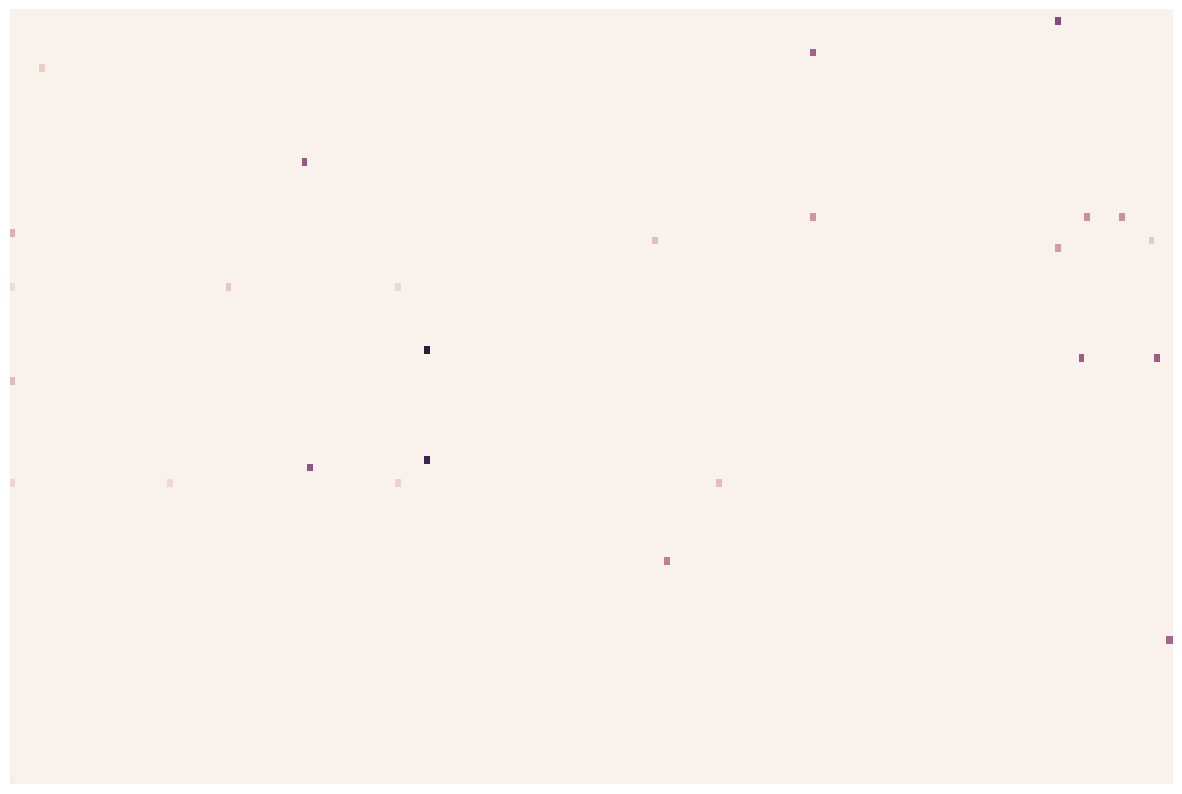

In [44]:
fig, ax1 = plt.subplots(1,1,figsize=(15,10))
dum = sns.heatmap(data[1:100,1:200].todense(), xticklabels=False, yticklabels=False, 
            linewidths=0, cbar=False, ax=ax1)

In [25]:
print(news_data.target)
print(news_data.target_names)

[2 0 0 ..., 2 1 2]
['comp.os.ms-windows.misc', 'rec.sport.baseball', 'sci.space']


### Selecting the Number of Clusters

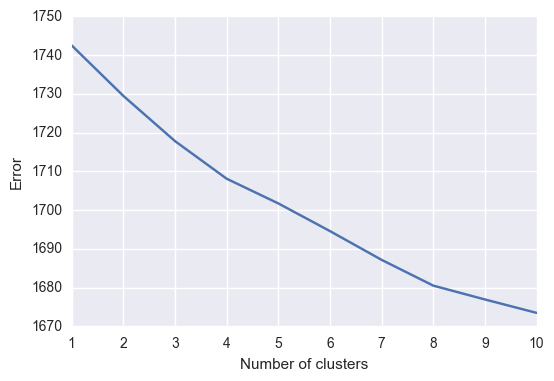

In [26]:
evaluate_clusters(data, 10)

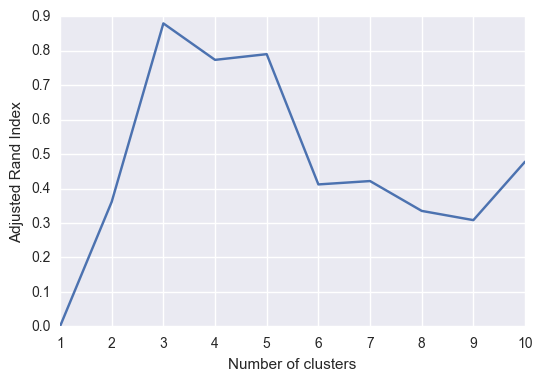

In [27]:
ri_evaluate_clusters(data,10,news_data.target)

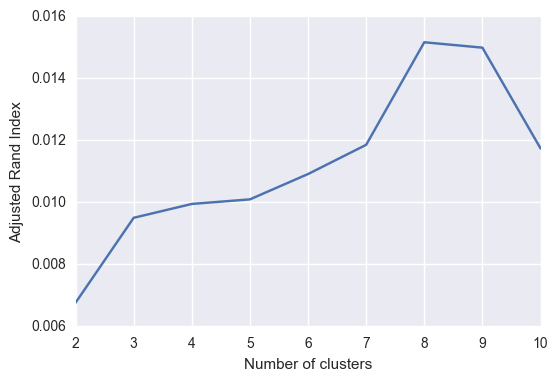

In [28]:
sc_evaluate_clusters(data,10)

### Looking into the clusters

In [29]:
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans.fit_predict(data)

array([1, 1, 1, ..., 2, 1, 2], dtype=int32)

In [30]:
print("Top terms per cluster:")
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("Cluster {}:".format(i))
    for ind in order_centroids[i, :10]:
        print(' {}'.format(terms[ind]))
    print('')

Top terms per cluster:
Cluster 0:
 access
 digex
 pat
 ax
 com
 dseg
 ti
 prb
 net
 mccall

Cluster 1:
 edu
 windows
 com
 university
 article
 writes
 cs
 posting
 host
 ca

Cluster 2:
 space
 nasa
 edu
 henry
 gov
 alaska
 moon
 toronto
 orbit
 launch



In [45]:
kmeans?

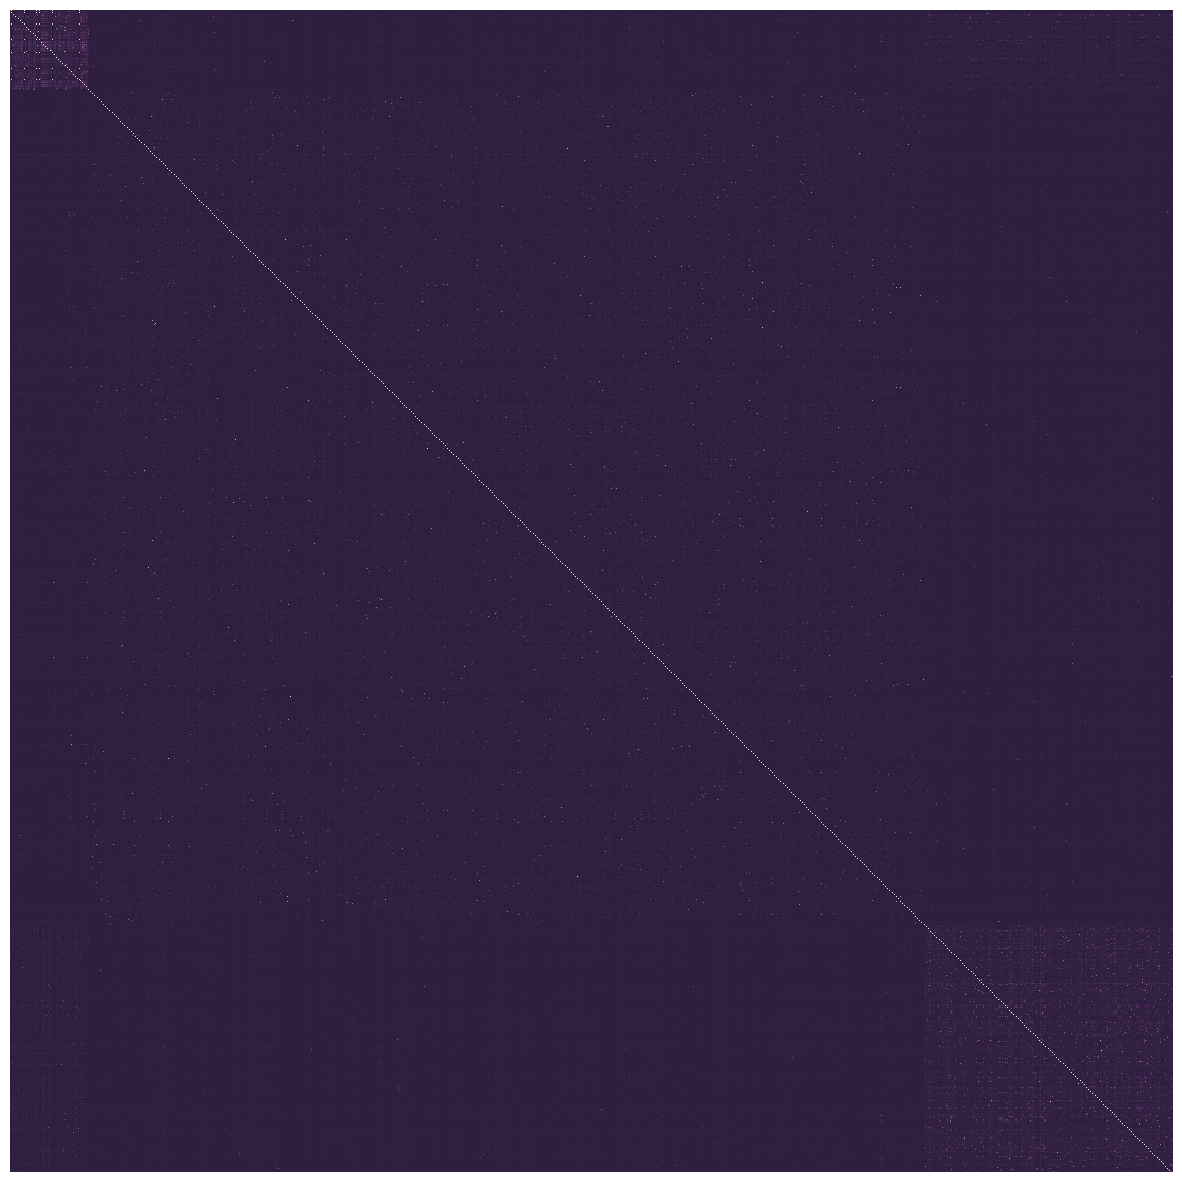

In [32]:
euclidean_dists = metrics.euclidean_distances(data)
labels = kmeans.labels_
idx = np.argsort(labels)
clustered_dists = euclidean_dists[idx][:,idx]
fig, ax1 = plt.subplots(1,1,figsize=(15,15))
dum = sns.heatmap(clustered_dists, xticklabels=False, yticklabels=False, linewidths=0, square=True,cbar=False, ax=ax1)

Let's visualize with MDS.   Note that MDS is a slow algorithm and we can't do all 1700+ data points quickly, so we will take a random sample.

In [33]:
dim = euclidean_dists.shape[0]
subset = np.random.random_integers(0,dim-1,500)

fit = mds.fit(euclidean_dists[subset][:,subset])
pos = fit.embedding_

/Users/evimaria/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1780 + 1) instead
  from ipykernel import kernelapp as app


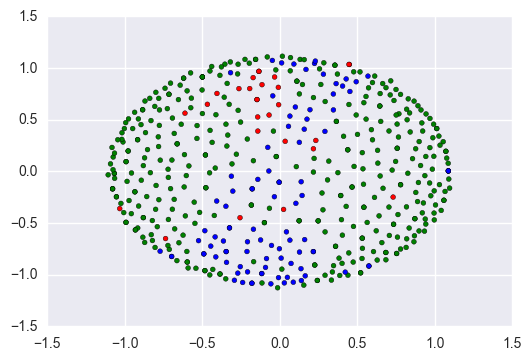

In [34]:
cols = [['r','g','b'][l] for l in labels[subset]]
plt.scatter(pos[:, 0], pos[:, 1], s=12, c=cols)